## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(study_results_df, mouse_metadata_df, how="left", on=["Mouse ID"])

# Display the data table for preview
data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Check the number of mice.
mouse_count = len(data_complete["Mouse ID"].unique())
mouse_count

249

In [6]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
duplicate_mouse_id = data_complete.loc[data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [7]:
# Drop any duplicate rows
duplicate_mouses = data_complete[data_complete["Mouse ID"]=="g989"]
duplicate_mouses
clean_data = data_complete[data_complete["Mouse ID"].isin(duplicate_mouse_id)==False]
clean_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Recheck the number of mice
distinct_mouse_id = len(clean_data["Mouse ID"].unique())
distinct_mouse_id

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
summary_stats = clean_data.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

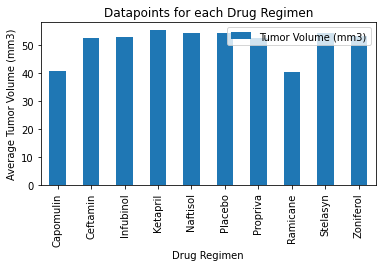

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
grouped_drug_regimen = clean_data.groupby("Drug Regimen")
grouped_drug_regimen
# grouping mean of tumor volume against each drug regimen
avg_vol_drug = grouped_drug_regimen["Tumor Volume (mm3)"].mean().to_frame()
avg_vol_drug
# Bar plot showing total volume against each drug regimen
avg_vol_drug.plot(kind="bar", figsize=(6,3))
plt.title("Datapoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
plt.tight_layout()

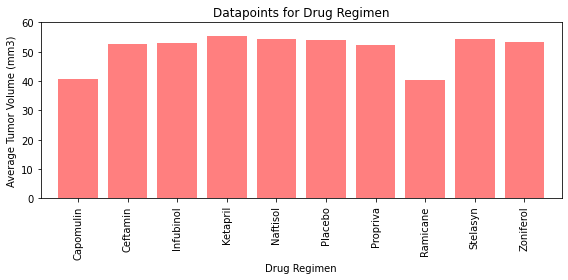

In [33]:
# General identical bar plot using pyplot instead of pandas.
#y_axis = np.arange(len(clean_data["Mouse ID"])
#plt.bar(x_axis, users, color='r', alpha=0.5, align="center")
x_axis = np.arange(len(avg_vol_drug))
tickLocations = [value for value in x_axis]

plt.figure(figsize=(8, 4))
plt.bar(x_axis, avg_vol_drug["Tumor Volume (mm3)"], color='r', alpha=0.5, align="center")
plt.xticks(tickLocations, list(avg_vol_drug.index), rotation="vertical") 
plt.xlim(-0.75, len(x_axis) - 0.25)
plt.ylim(0, 60)
plt.title("Datapoints for Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

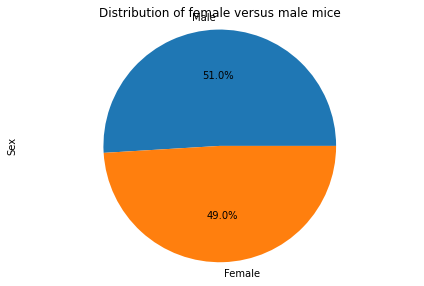

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_count = clean_data["Sex"].value_counts()
plt.figure()
mice_count.plot(kind="pie", autopct='%1.1f%%')
plt.tight_layout()
plt.axis("equal")
plt.title("Distribution of Female vs Male Mice")
plt.tight_layout()
plt.show()

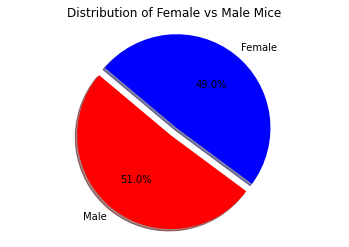

In [19]:
# Generate identical pie plot using pyplot
colors = ["red","blue"]
explode = (0.1,0)
plt.figure()
plt.pie(mice_count.values, explode=explode, labels=mice_count.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes - equal, so there is perfect circle
plt.axis("equal")
plt.title("Distribution of Female vs Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_data = clean_data[(clean_data["Drug Regimen"] == "Capomulin") | 
                          (clean_data["Drug Regimen"] == "Ramicane") | 
                          (clean_data["Drug Regimen"] == "Infubinol") | 
                          (clean_data["Drug Regimen"] == "Ceftamin")]

regimen_data = regimen_data[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
regimen_data = regimen_data.groupby(["Mouse ID", "Drug Regimen"])
drug_regimen = regimen_data["Tumor Volume (mm3)"].sum().to_frame()
regimen_plot = drug_regimen["Tumor Volume (mm3)"]
drug_regimen

,,Tumor Volume (mm3)
Mouse ID,Drug Regimen,
a203,Infubinol,563.127077
a251,Infubinol,552.370946
a275,Ceftamin,527.709651
a411,Ramicane,407.013854
a444,Ramicane,430.600524
...,...,...
y769,Ceftamin,562.908873
y793,Capomulin,385.068292
y865,Ceftamin,549.985586


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [27]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.
quartiles = regimen_plot.quantile([.25,.5,.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q-lower_q

# Calculate the IQR and quantitatively determine outliers
print(f"The lower quartile of Tumor Volume (mm3) is: {lower_q}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upper_q}")
print(f"The IQR range of Tumor Volume (mm3) is: {iqr}")
print(f"The median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

# determine if there are any potential outliers. 
lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

# Determine outliers using upper and lower bounds
print(f"Values below {lower_bound} are possible outliers.")
print(f"Values above {upper_bound} are possible outliers.")

The lower quartile of Tumor Volume (mm3) is: 340.0010610275
The upper quartile of Tumor Volume (mm3) is: 449.98455965499994
The IQR range of Tumor Volume (mm3) is: 109.98349862749996
The median of Tumor Volume (mm3) is: 394.845840265 
Values below 175.02581308625005 are possible outliers.
Values above 614.9598075962499 are possible outliers.


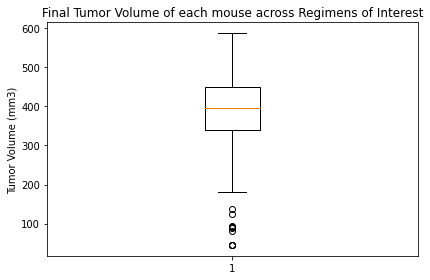

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
fig, intr = plt.subplots()
intr.set_title('Final Tumor Volume of each Mouse across Regimens of Interest')
intr.set_ylabel('Tumor Volume (mm3)')
intr.boxplot(regimen_plot)
plt.tight_layout()
plt.show()


## Line and Scatter Plots

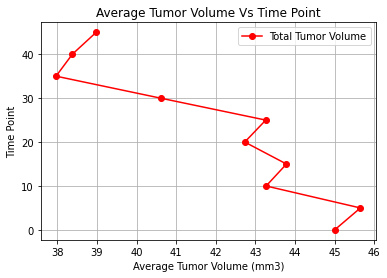

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
tumor_data = clean_data[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "b128")]
tumor_data = tumor_data.groupby(["Drug Regimen", "Timepoint"])
tumor_data_avg = tumor_data["Tumor Volume (mm3)"].mean().to_frame()
tumor_index = tumor_data_avg.unstack(0)
tumor_plot = tumor_index["Tumor Volume (mm3)"]

y_axis = [0,5,10,15,20,25,30,35,40,45]
plt.figure()
total_tumor, = plt.plot(tumor_plot["Capomulin"], y_axis, marker= "o", color="r", label="Total Tumor Volume" )
plt.legend(handles=[total_tumor], loc="best")
plt.title("Average Tumor Volume Vs Time Point")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Time Point")
plt.grid(True)
plt.show()

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
scatter_data = clean_data[(clean_data["Drug Regimen"] == "Capomulin")]
scatter_data = scatter_data[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
grouped_drug_regimen = scatter_data.groupby(["Mouse ID","Weight (g)"])
scatter_data_group = grouped_drug_regimen["Tumor Volume (mm3)"].mean().to_frame()
scatter_data_group = scatter_data_group.reset_index()
scatter_data_group

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights